# Metodos y funciones Scikit learn para la partición de los datos
 
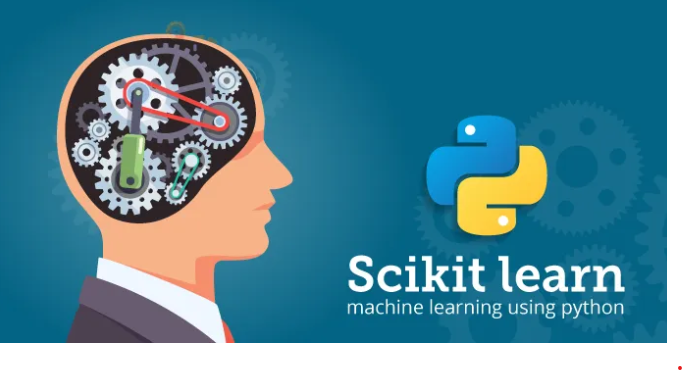

In [2]:
import arff
import pandas as pd

In [3]:
# Funcion que carga el conjunto de datos

def load_kdd_dataset(data_path):
    with open(data_path, 'r') as grupo_entreno:
        dataset=arff.load(grupo_entreno)
        attributes = [attr[0] for attr in dataset["attributes"]]
        return  pd.DataFrame(dataset["data"], columns = attributes)

In [4]:
#obtencion del dataFrame
df = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")

In [6]:
#Información de los datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [7]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## ✅ 1. Mejora la capacidad de generalización del modelo

Dividir los datos permite asegurarte de que tu modelo aprenda patrones generales y no memorice los datos específicos del conjunto de entrenamiento. Esto evita problemas de sobreajuste (overfitting) y mejora su capacidad de hacer predicciones con datos nuevos.

- Entrenamiento: El modelo aprende patrones.
- Validación: Se ajustan hiperparámetros y se evalúa el modelo durante el desarrollo.
- Prueba: Se evalúa el modelo final en datos completamente nuevos.

## ✅ 2. Permite evaluar el rendimiento real del modelo

Si solo entrenas y evalúas el modelo con los mismos datos, obtendrás resultados poco confiables. Al usar un conjunto de prueba, puedes estimar el rendimiento que tendría el modelo en datos reales, garantizando una evaluación justa.

Sin división: El modelo parecerá más preciso de lo que realmente es.
Con división: Obtienes una medida más realista del rendimiento del modelo.

## ✅ 3. Ayuda a evitar el sobreajuste (overfitting)
El overfitting ocurre cuando el modelo aprende demasiado bien los datos de entrenamiento, incluso errores o ruido, pero falla al generalizar a nuevos datos.

Dividir los datos permite:

Detectar sobreajuste mediante la evaluación en el conjunto de validación y prueba.
Ajustar hiperparámetros para minimizar este problema.


## ✅ 4. Facilita la optimización de hiperparámetros
El conjunto de validación es crucial para ajustar los hiperparámetros (parámetros que no se aprenden durante el entrenamiento, como el valor de regularización o la cantidad de árboles en un Random Forest).

Ajustas los hiperparámetros con los datos de validación.
Usas los datos de prueba solo una vez para medir el rendimiento final.
Evita usar el conjunto de prueba repetidamente para evitar "filtrar información" y sobreestimar el rendimiento del modelo

## ✅ 5. Permite detectar problemas de datos
Cuando divides los datos, es más fácil identificar problemas como:

Desbalanceo de clases (cuando una clase está sobrerrepresentada).
Datos duplicados o inconsistencias.
Cambios en el rendimiento del modelo en diferentes subconjuntos (indica que el modelo podría estar sesgado).

## ✅ 6. Facilita la comparación entre modelos
Dividir los datos asegura que puedas comparar modelos de manera justa usando los mismos conjuntos de validación y prueba.

Esto permite:

Evaluar cuál modelo funciona mejor bajo las mismas condiciones.
Tomar decisiones informadas sobre qué modelo implementar.

##✅ 7. Ayuda a evaluar la robustez del modelo en diferentes escenarios
Al usar técnicas como la validación cruzada (cross-validation) o la división estratificada (StratifiedShuffleSplit), puedes probar tu modelo en varios subconjuntos diferentes, asegurando que el modelo sea robusto y consistente.


# Expreciones
1. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
2. train_set, test_set = traint_test_split(df, test_size=0.4, random_state = 42)

# 2. División del conjunto de datos 

Se debe separar el conjunto de datos en diferentes subconjuntos necesarios para realizar los procesos de entrenamiento, validación y pruebas


In [9]:
# Separamos el conjunto de datos en 60% para entrenamiento y 40% para pruebas
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.4, random_state = 42)

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75583 entries, 98320 to 121958
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     75583 non-null  float64
 1   protocol_type                75583 non-null  object 
 2   service                      75583 non-null  object 
 3   flag                         75583 non-null  object 
 4   src_bytes                    75583 non-null  float64
 5   dst_bytes                    75583 non-null  float64
 6   land                         75583 non-null  object 
 7   wrong_fragment               75583 non-null  float64
 8   urgent                       75583 non-null  float64
 9   hot                          75583 non-null  float64
 10  num_failed_logins            75583 non-null  float64
 11  logged_in                    75583 non-null  object 
 12  num_compromised              75583 non-null  float64
 13  root_shell      

In [12]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50390 entries, 378 to 89600
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50390 non-null  float64
 1   protocol_type                50390 non-null  object 
 2   service                      50390 non-null  object 
 3   flag                         50390 non-null  object 
 4   src_bytes                    50390 non-null  float64
 5   dst_bytes                    50390 non-null  float64
 6   land                         50390 non-null  object 
 7   wrong_fragment               50390 non-null  float64
 8   urgent                       50390 non-null  float64
 9   hot                          50390 non-null  float64
 10  num_failed_logins            50390 non-null  float64
 11  logged_in                    50390 non-null  object 
 12  num_compromised              50390 non-null  float64
 13  root_shell         

In [15]:
# Division del conjunto de datos de prueba en datos de validación y datos de prueba
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state = 42)

In [16]:
print("Longitud del Train Set: ", len(train_set))
print("Longitud del validation Set: ", len(val_set))
print("Longitud del Test n Set: ", len(test_set))

Longitud del Train Set:  75583
Longitud del validation Set:  25195
Longitud del Test n Set:  25195


# 3. Particionado aleatorio y Stratified Sampling
Sklearn implementa la función train_test_split, sin embargo esta función por defecto realiza un particionado del conjunto de datos aleatorioncada que se ejecuta el script. Aún añadiendo una semilla fija para generación aleatoria, cada que carguemos de nuevo el conjunto de datos se generarán nuevos conjuntos de datos. Esto puede ocasionar que despues de muchos intentos, el algorirmo vea o conozca todo el conjunto de datos.

Para solucionar este problema, sklearn ha introducido el parametro shuffle en la función treain_test_split

In [20]:
train_set, test_set = train_test_split(df, test_size = 0.4, random_state=42, shuffle=False)

Los metodos anteriores para dividir el conjunto de datos es adecuado siempre y cuando nuestro conjunto de datos original sea grande, pero si es pequeo se corre el riesgo de provocar sampling bias.

Para evitar esto se utiliza el método de sampling llamado Stratified sampling. La población se divide en subconjuntos homógeneos llamados state. El objeivo es que no quede ninguna caracteristica del conjunto de datos sin representación en ninguno de los conjuntos de datos para una o mas caracteristicas en particular.


# 3.1 Fenómeno de la division aleatoria de los datos.
## 🔎 ¿Por qué la división aleatoria puede causar problemas?

### Cuando se dividen los datos de forma aleatoria usando train_test_split(), existe el riesgo de que:

## Las clases no estén balanceadas en los conjuntos de entrenamiento y prueba.
Por ejemplo, si tu dataset tiene 100 muestras de la clase 0 y 20 muestras de la clase 1, una división aleatoria podría asignar muchas más muestras de la clase 0 al conjunto de entrenamiento y dejar pocas muestras de la clase 1 en el conjunto de prueba. Esto hace que el modelo esté sesgado hacia la clase mayoritaria.

## El modelo podría no ver ciertos patrones durante el entrenamiento.
Si la división aleatoria separa ciertos ejemplos clave del conjunto de entrenamiento, el modelo podría no aprender ciertos patrones importantes y rendir peor en el conjunto de prueba.

## Los resultados del modelo cambian en cada ejecución.
Si los datos se dividen de manera diferente cada vez, los resultados del modelo también variarán, lo que dificulta la reproducibilidad y la comparación de modelos.

## 🚨 El problema real: Variabilidad muestral
La variabilidad muestral ocurre porque la división aleatoria no garantiza que los conjuntos de entrenamiento y prueba sean representativos del dataset original. Esto significa que la distribución de clases, valores y patrones podría variar en cada división.

#Ejemplo, supongamos el siguiente dataset

Dataset completo: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
Si haces una división aleatoria:

División 1:

Entrenamiento: [0, 0, 0, 1, 1, 1, 1]
Prueba: [0, 0, 1]
División 2:

Entrenamiento: [0, 0, 0, 0, 1, 1, 1]
Prueba: [0, 1, 1]
La proporción de clases en el conjunto de entrenamiento y prueba puede variar bastante entre divisiones. Esto afectará el rendimiento del modelo.



#🎯 ¿Por qué esto es importante?

El modelo podría no aprender patrones importantes si el conjunto de entrenamiento no es representativo del dataset original. Además, la variabilidad muestral afecta la precisión del modelo, especialmente en datasets pequeños o desbalanceados.

Para mitigar este problema, hay dos soluciones principales:

## ✅ Solución 1: Usar random_state para reproducibilidad
Al fijar un random_state, garantizas que la división sea siempre la misma, asegurando que los resultados del modelo sean reproducibles.

from sklearn.model_selection import train_test_split

# División reproducible
### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## ✅ Solución 2: Usar stratify para mantener la proporción de clases

El parámetro stratify asegura que la proporción de clases en el conjunto de entrenamiento y prueba sea la misma que en el dataset original.

### X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
Esto es fundamental para datasets desbalanceados, donde algunas clases tienen muchas más muestras que otras.

# 💡 Conclusión:
El uso de shuffle=True sin stratify puede causar que las clases no se distribuyan uniformemente en los conjuntos de entrenamiento y prueba.
Para evitar esto, es importante usar stratify en datasets desbalanceados o fijar un random_state para asegurar resultados reproducibles. ​

# 🎯 ¿Qué es el parámetro shuffle en train_test_split()?
El parámetro shuffle indica si los datos deben ser mezclados aleatoriamente antes de dividirlos en conjuntos de entrenamiento y prueba. Su valor por defecto es True, lo que significa que train_test_split() mezcla los datos aleatoriamente antes de realizar la división.

Esto tiene ventajas y desventajas, dependiendo del tipo de datos y del problema que estás abordando.


## ✅ Efecto de shuffle=True (Por defecto)
Cuando shuffle=True, los datos se reorganizan aleatoriamente antes de ser divididos en entrenamiento y prueba. Esto es útil porque:

Evita sesgos en la división.
Si los datos tienen algún tipo de orden o agrupamiento, una división secuencial podría producir conjuntos de entrenamiento y prueba desbalanceados. La mezcla aleatoria asegura que cada conjunto sea una muestra representativa del dataset original.

Mejora la representatividad de los conjuntos.
Mezclar los datos ayuda a garantizar que ambos conjuntos (entrenamiento y prueba) contengan ejemplos variados y no se pierdan patrones importantes.

# Stratified sampling
El metodo de startified sampling divide los datos en conjuntos homogéneos llamados strata. El objetivo es que no se quede ninguna caracteristica  sin represntación en ninguno de los conjuntos de datos para una o varias caracteristicas en particular

sklearn introduce el parametro startify en la función train_test_split para controlar ese comportamiento.


In [24]:
train_set, test_set = train_test_split(df, test_size =0.4, random_state=42, stratify=df["protocol_type"])

## 4. Generación función de particionado

Se pasa la columna de clases stratify='protocol_type para que se haga la stratificacion es decir cada subconjunto de datos tendra proporcionalmente una representacion de las caracteristicas del dataset general, de gran utilidad en datasets desbalanceados


In [37]:
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat
    )
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat
    )
    return train_set, val_set, test_set


In [38]:
print("Longitud del conjunto de datos: ", len(df))

Longitud del conjunto de datos:  125973


In [42]:
train_set, val_set , test_set = train_val_test_split(df, stratify='protocol_type')

In [43]:
print("Longitud del Train Set: ", len(train_set))
print("Longitud del validation Set: ", len(val_set))
print("Longitud del Test n Set: ", len(test_set))

Longitud del Train Set:  75583
Longitud del validation Set:  25195
Longitud del Test n Set:  25195


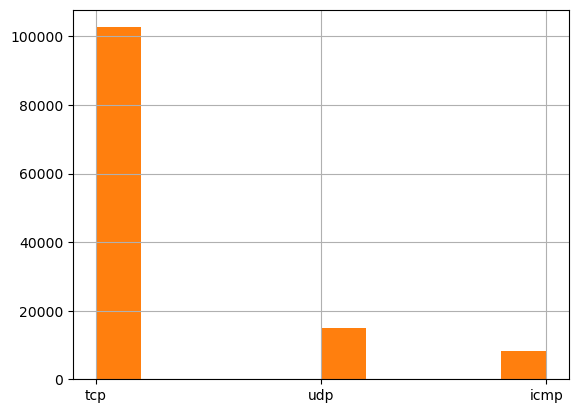

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()          #En este punto mostramos un histograma de la serie f["protocol_type"]
plt.show()

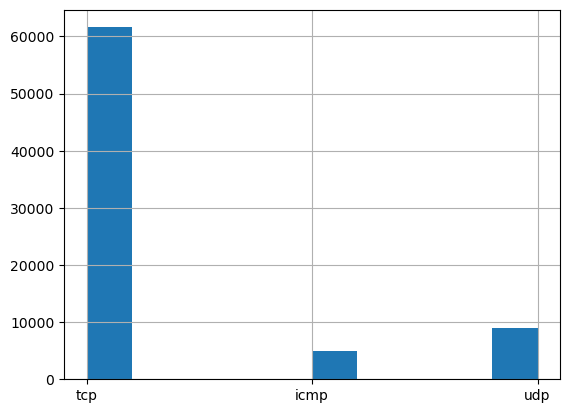

In [46]:
train_set["protocol_type"].hist()          #En este punto mostramos un histograma de la serie f["protocol_type"]
plt.show()

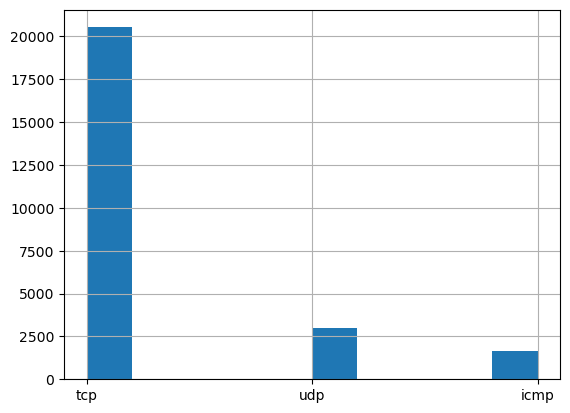

In [47]:
val_set["protocol_type"].hist()          #En este punto mostramos un histograma de la serie f["protocol_type"]
plt.show()

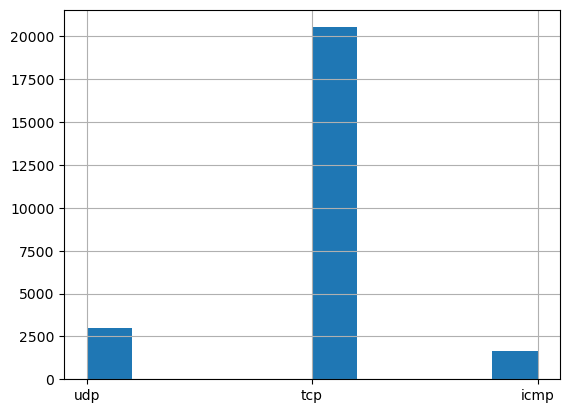

In [48]:
test_set["protocol_type"].hist()          #En este punto mostramos un histograma de la serie f["protocol_type"]
plt.show()